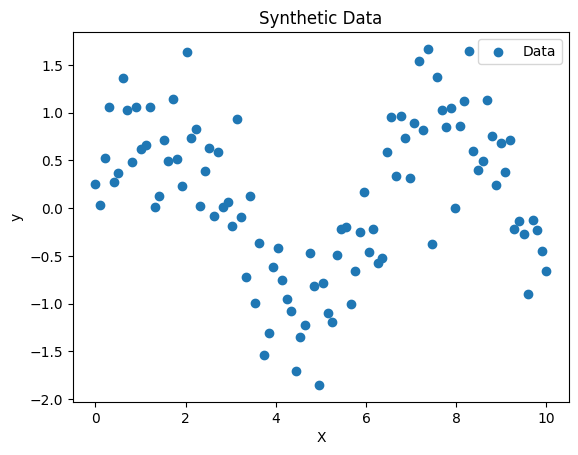

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.5, X.shape)

# Plot the data
plt.scatter(X, y, label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.legend()
plt.show()


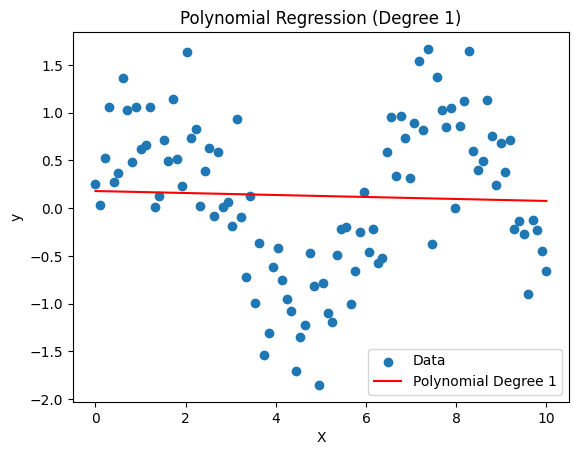

Mean Squared Error (Degree 1): 0.6443757606961537


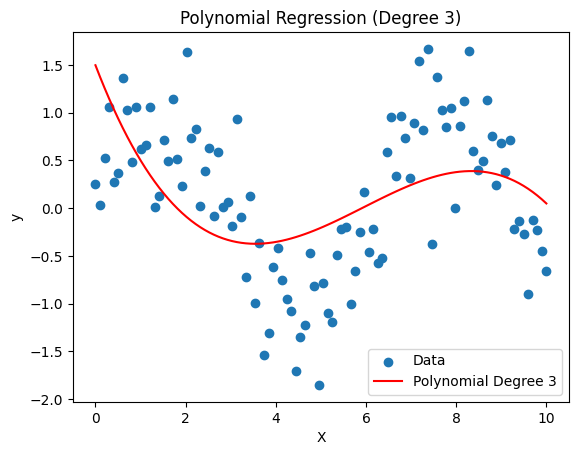

Mean Squared Error (Degree 3): 0.48276202145823766


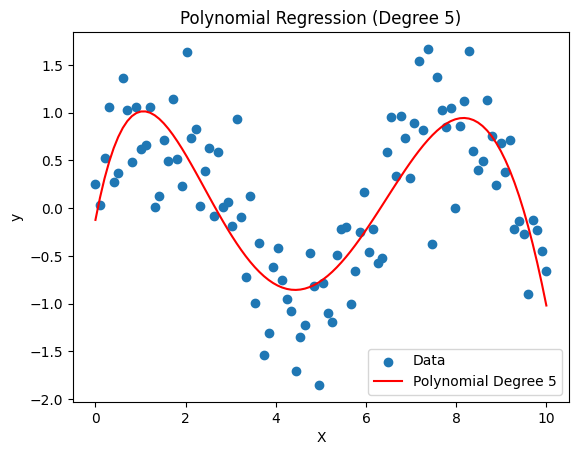

Mean Squared Error (Degree 5): 0.22757985578408202


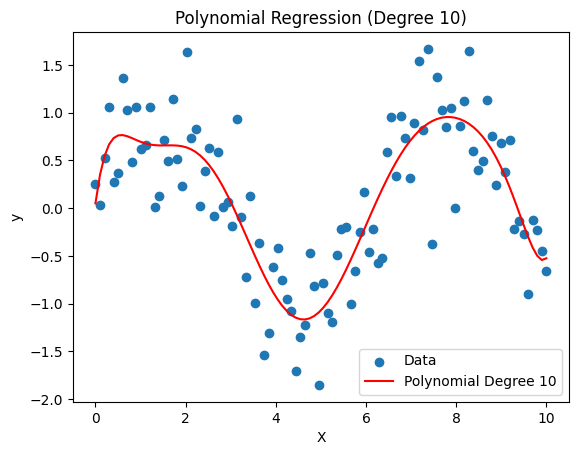

Mean Squared Error (Degree 10): 0.18281640271402147


In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Function to plot model predictions
def plot_model_predictions(degree, X, y):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.scatter(X, y, label='Data')
    plt.plot(X, y_pred, color='red', label=f'Polynomial Degree {degree}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

    mse = mean_squared_error(y, y_pred)
    print(f'Mean Squared Error (Degree {degree}): {mse}')

# Train and plot models of different degrees
for degree in [1, 3, 5, 10]:
    plot_model_predictions(degree, X, y)


In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(degree, X_train, y_train, X_test, y_test):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Train MSE: {train_mse}, Test MSE: {test_mse}')

# Evaluate models of different degrees
for degree in [1, 3, 5, 10]:
    evaluate_model(degree, X_train, y_train, X_test, y_test)


Degree 1 - Train MSE: 0.6149583398261936, Test MSE: 0.7756827626344224
Degree 3 - Train MSE: 0.4461102060566974, Test MSE: 0.6501921628190115
Degree 5 - Train MSE: 0.22620469868572673, Test MSE: 0.23580117302876064
Degree 10 - Train MSE: 0.18731559751491098, Test MSE: 0.204343219304838


conclusion
degree 1 -> high bias -> high error -> underfitting  
degree 2 -> low mse -> chance of overfitting -> high variance  
best one -> degree 5